In [2]:
import pandas as pd

df = pd.read_csv("data.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

# Features and Target
X = df.loc[:, df.columns != "diagnosis"]
y = df.loc[:, "diagnosis"]


Shape: (569, 33)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     120

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Load dataset
df = pd.read_csv("data.csv")

# Features and Target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# 1. Replace Inf with NaN, then fill missing values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)   # you can also try .fillna(X.mean()) for better handling

# 2. Remove zero-variance (constant) features
selector = VarianceThreshold(threshold=0.0)
X = selector.fit_transform(X)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 4. Standardize features (now safe)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


Training set shape: (455, 31)
Testing set shape: (114, 31)
X_train_scaled shape: (455, 31)
X_test_scaled shape: (114, 31)


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Encode target (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.97
Recall: 0.93
ROC-AUC: 1.00


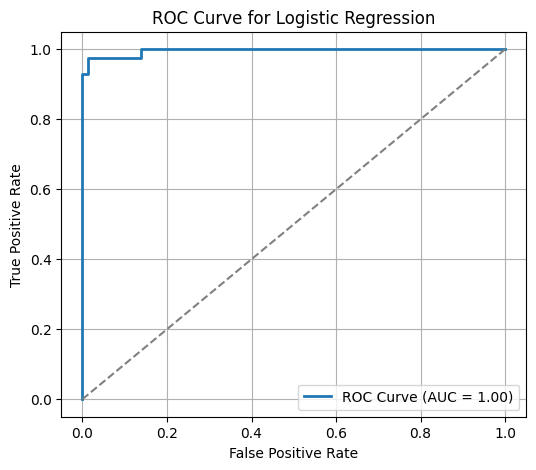

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Precision & Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Set custom threshold
threshold = 0.4
y_pred_tuned = (y_prob >= threshold).astype(int)

# Evaluation
cm = confusion_matrix(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
 [[71  1]
 [ 2 40]]
Precision: 0.98
Recall: 0.95


# Sigmoid Function

Logistic Regression outputs a probability for class 1 (positive class) using the sigmoid function:

𝜎
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
σ(z)=
1+e
−z
1
	​


Where:

𝑧
=
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
.
.
.
+
𝑤
𝑛
𝑥
𝑛
+
𝑏
z=w
1
	​

x
1
	​

+w
2
	​

x
2
	​

+...+w
n
	​

x
n
	​

+b (linear combination of features)

𝜎
(
𝑧
)
σ(z) maps any real number to a value between 0 and 1

This probability represents the model’s confidence that the sample belongs to class 1.